In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
from collections import namedtuple

(400, 400, 3)

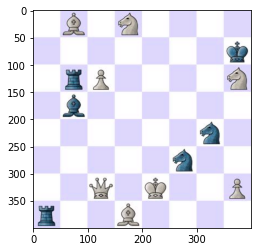

In [2]:
im = cv2.imread('./1B1N4-7k-1rP4N-1b6-6n1-5n2-2Q1K2P-r2B4.jpeg')
label='1B1N4-7k-1rP4N-1b6-6n1-5n2-2Q1K2P-r2B4'
plt.imshow(im)
im.shape

# Machinery

## split a chess board into its squares

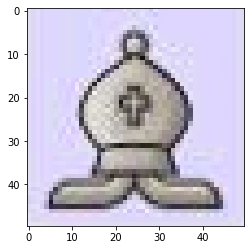

In [3]:
def split_chessboard(board_image):
    '''Take in chess board (400x400x3 color image) and output an ndarray of the pieces (8x8x50x50x3)
    such that result[0, 1] is the (0, 1) chess piece (0 is the column, 1 is the row)'''
    return board_image.reshape(8, 50, 8, 50, 3).transpose((0, 2, 1, 3, 4))
plt.imshow(split_chessboard(im)[0, 1])

## Get the label
given a row, column and string of the chess boards positioning (FEN description) of the chess board, return the piece code.

Overview of the representation:
the first part of the string denotes 

In [4]:
def get_position(fen, row, column, delim='-'):
    ''' returns a string representing the piece. one or Three parts:
    1. B/W = black or white square
    2. B/W = black or white piece, no more characters if no piece.
    3. piece key or doesnt exist if blank. (same encoding as white pieces in FEN)
    
    pawn = "P"
    knight = "N"
    bishop = "B"
    rook = "R"
    queen = "Q"
    king = "K"
    '''
    assert isinstance(column, int), f'column must be an integer. Got {column}'
    assert isinstance(row, int), f'row must be an integer. Got {row}'
    square_color = 'W' if ((column + row) % 2) == 0 else 'B'
    col_pos = 0
    
    # col_pos always points to the correct position for the current character. 
    for char in fen.split(delim)[row]:
        if char in '12345678':  # empty spaces (cannot be larger then 8)
            if col_pos == column:  # this was the correct position
                return square_color
            col_pos += int(char)  # the next position is offset by this many
            continue  # this position is completed, move on to the next one
        if column == col_pos:
            piece_color = 'B' if char.islower() else 'W'
            return square_color + piece_color + char.upper()
        col_pos += 1
    return square_color

## Cleanly split a board into its squares and their images, positions and labels

In [5]:
Tile = namedtuple('Tile', ['image', 'row', 'column', 'background_color', 'piece_color', 'piece_label'])
def make_data(board, name):
    out = []
    ims = split_chessboard(board)
    for row in range(8):
        for column in range(8):
            lab = get_position(name, row, column)
            has_piece = len(lab) > 1
            piece_color = lab[1] if has_piece else ''
            piece_label = lab[2] if has_piece else ''
            out.append(Tile(ims[row, column], row, column, lab[0], piece_color, piece_label))
    return out

# Demonstration

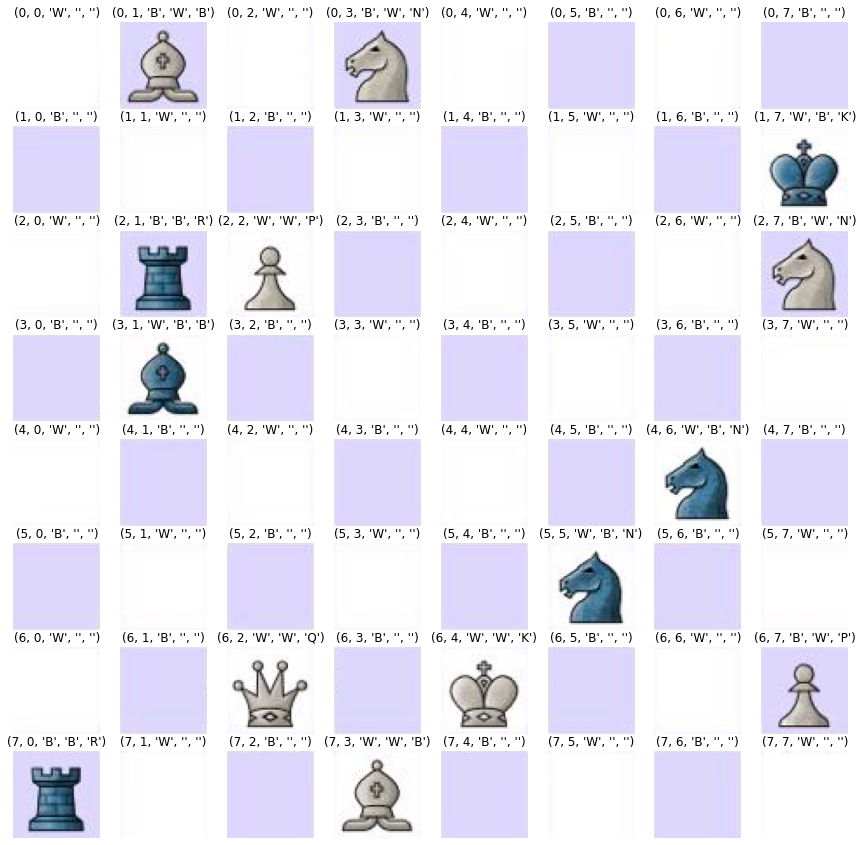

In [6]:
plt.figure(figsize=(15, 15))
for tile in make_data(im, label):
    plt.subplot(8,8,tile.row * 8 + tile.column + 1)
    plt.title(f'{tile[1:]}')
    plt.imshow(tile.image)
    plt.axis('off')